In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
try:
    Measurement = Base.classes.measurement
    Station = Base.classes.station
    print("Tables successfully referenced.")
except Exception as e:
    print(f"Error: {e}")
    print("Available classes:", Base.classes.keys())



Tables successfully referenced.


In [8]:
# Create a session
session = Session(engine)  



# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
Most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
Most_recent_date

'2017-08-23'

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Year_Precipitation = (dt.date(2017,8,23) - dt.timedelta(days=365)).strftime('%Y-%m-%d')

# Calculate the date one year from the last date in data set.
Year_from_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Year_Precipitation).all()

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
Year_Precipitation_df = pd.DataFrame(Year_from_date, columns=['date', 'precipitation'])

# Sort the dataframe by date
Year_Precipitation_df = Year_Precipitation_df.sort_values('date')

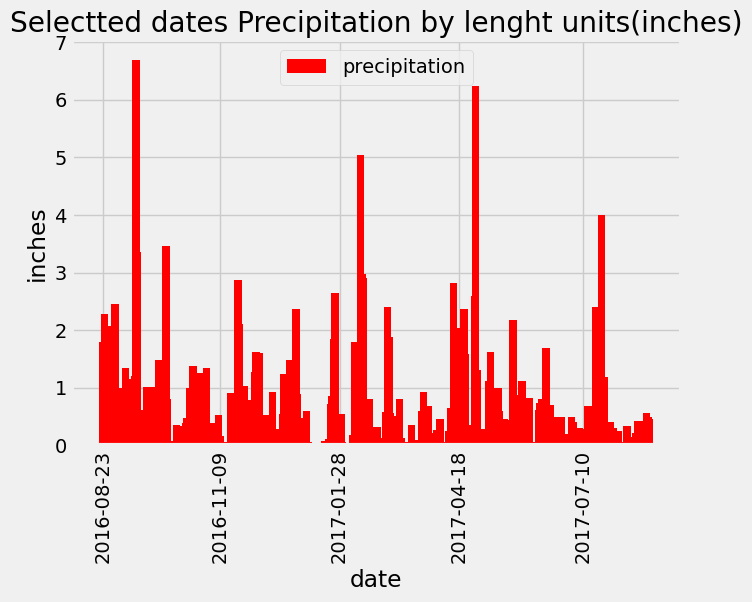

In [10]:

# Use Pandas Plotting with Matplotlib to plot the data
Selected_Dates = ['2016-08-23','2016-11-09', '2017-01-28','2017-04-18','2017-07-10']

plt.figure(figsize=(7,5))
plt.bar(Year_Precipitation_df['date'], Year_Precipitation_df['precipitation'], width=5, color='red')
plt.xlabel('date')
plt.ylabel('inches')
plt.xticks(Selected_Dates, rotation=90)
plt.legend(['precipitation'], loc='upper center')
plt.title("Selectted dates Precipitation by lenght units(inches)")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
Precipitation_data = Year_Precipitation_df['precipitation'].describe()
Sum_Stat = pd.DataFrame(Precipitation_data)
Sum_Stat

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
from sqlalchemy import func
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_Stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_Actve_Station_Id = 'USC00519281'

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == Most_Actve_Station_Id).one()[0]
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == Most_Actve_Station_Id).one()[0]
avgerage_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == Most_Actve_Station_Id).one()[0]

print(f"lowest_temp = {lowest_temp}, highest_temp = {highest_temp}, average_temp = {avgerage_temp}")

lowest_temp=54.0, highest_temp=85.0, average_temp=71.66378066378067


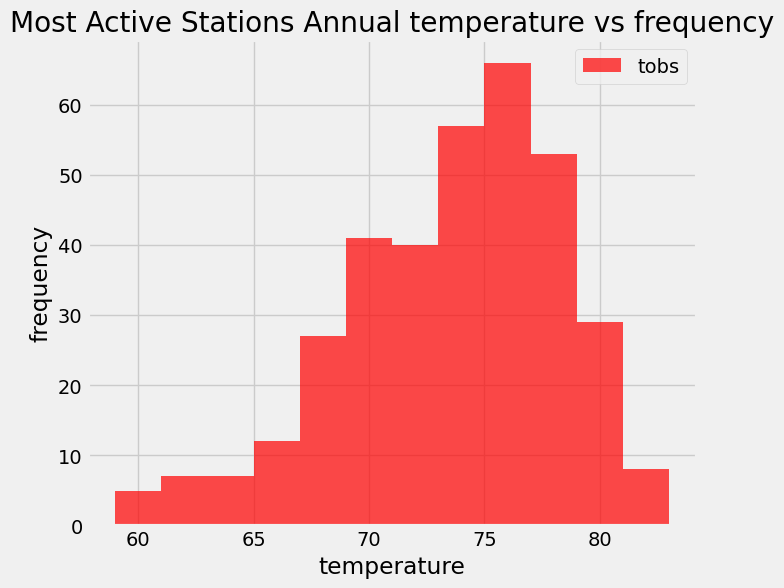

In [25]:
# Using the most active station id, Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Annual_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Most_Actve_Station_Id).\
    filter(Measurement.date >= Year_Precipitation).all()

Annual_Data_df = pd.DataFrame(Annual_data, columns=['date', 'temperature'])

plt.figure(figsize=(7,6))
plt.hist(Annual_Data_df['temperature'], bins=12, alpha=0.7, color='red')
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.legend(['tobs'], loc='upper right')
plt.title("Most Active Stations Annual temperature vs frequency" )
plt.show()

# Close Session

In [26]:
# Close Session
session.close()